In [1]:
import pandas as pd

# Load the dataset
url = "https://github.com/rashakil-ds/Public-Datasets/blob/main/concrete.csv?raw=true"
concrete_data = pd.read_csv(url)

# Display the first few rows of the dataset
print(concrete_data.head())


   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
strength                                                 0
dtype: int64
       Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.167864   
std                                   104.506364   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   54

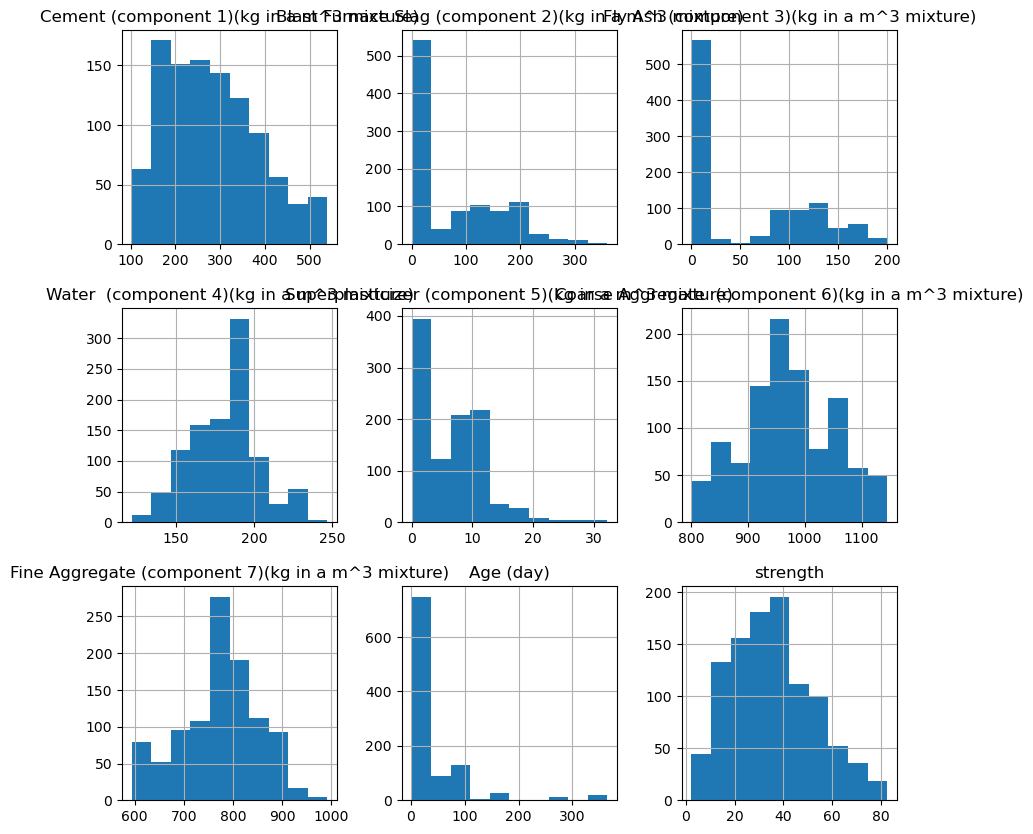

   Cement (component 1)(kg in a m^3 mixture)  \
0                                   2.477915   
1                                   2.477915   
2                                   0.491425   
3                                   0.491425   
4                                  -0.790459   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                          -0.856888       
1                                          -0.856888       
2                                           0.795526       
3                                           0.795526       
4                                           0.678408       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                   -0.847144   
1                                   -0.847144   
2                                   -0.847144   
3                                   -0.847144   
4                                   -0.847144   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Check for missing values
print(concrete_data.isnull().sum())

# Describe the data to understand its distribution
print(concrete_data.describe())

# Plot distributions of features and target variable
concrete_data.hist(figsize=(10, 10))
plt.show()

# Standardize numerical features if necessary
scaler = StandardScaler()
features = concrete_data.drop('strength', axis=1)
target = concrete_data['strength']
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame for the scaled features
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
print(scaled_features_df.head())


In [7]:
!pip install xgboost

     -------------------------------------- 124.9/124.9 MB 3.1 MB/s eta 0:00:00


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor()
}


In [9]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

# Train each model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} model trained.")


Linear Regression model trained.
Random Forest model trained.
XGBoost model trained.


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return mae, mse, rmse, r2

# Evaluate each model
for name, model in models.items():
    mae, mse, rmse, r2 = evaluate_model(model, X_test, y_test)
    print(f"{name} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}")


Linear Regression - MAE: 7.745559243921436, MSE: 95.97094009110684, RMSE: 9.796475901624362, R2: 0.6275531792314848
Random Forest - MAE: 3.8867629472954244, MSE: 31.54038360504696, RMSE: 5.616082585312199, R2: 0.8775971602615604
XGBoost - MAE: 2.996374957538346, MSE: 21.21804757371494, RMSE: 4.606305197630194, R2: 0.9176563827108167


                                             Feature  Importance
0          Cement (component 1)(kg in a m^3 mixture)    0.330491
7                                          Age (day)    0.330204
3          Water  (component 4)(kg in a m^3 mixture)    0.124515
1  Blast Furnace Slag (component 2)(kg in a m^3 m...    0.075569
4  Superplasticizer (component 5)(kg in a m^3 mix...    0.053607
6  Fine Aggregate (component 7)(kg in a m^3 mixture)    0.036654
5  Coarse Aggregate  (component 6)(kg in a m^3 mi...    0.029181
2         Fly Ash (component 3)(kg in a m^3 mixture)    0.019779


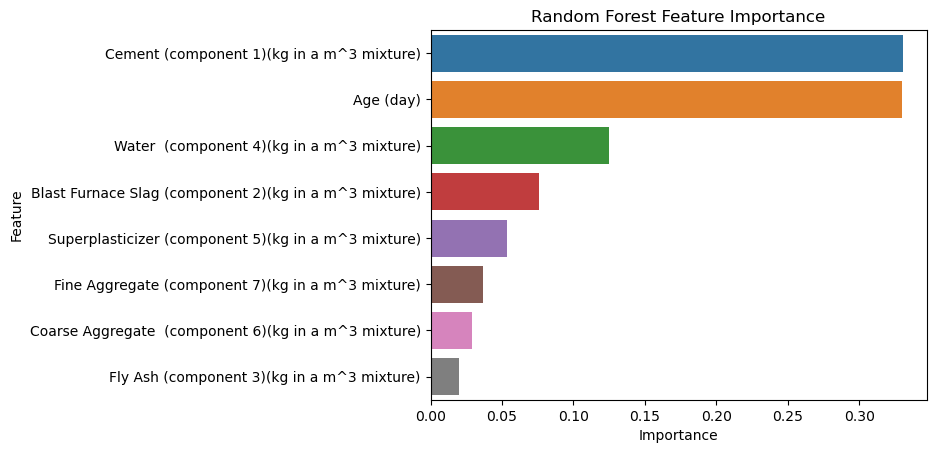

In [11]:
importances = models['Random Forest'].feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()


In [12]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search for Random Forest
grid_search = GridSearchCV(estimator=models['Random Forest'], param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters for Random Forest: {grid_search.best_params_}")

# Evaluate the best model
best_rf = grid_search.best_estimator_
mae, mse, rmse, r2 = evaluate_model(best_rf, X_test, y_test)
print(f"Tuned Random Forest - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest - MAE: 3.951935342117428, MSE: 32.32511709804999, RMSE: 5.685518190811633, R2: 0.8745517436558452
